In [ ]:
https://www.ncdc.noaa.gov/data-access/marineocean-data/extended-reconstructed-sea-surface-temperature-ersst-v5

In [16]:
from netCDF4 import Dataset as netcdf 
from pylab import *
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray as xr

import datetime


In [14]:
import urllib.request

for y in range(8):
    for m in range(11):
        url = 'https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/ersst.v5.'+str(y+2011)+str(m+1).zfill(2)+'.nc'
        urllib.request.urlretrieve(url, '/exports/csce/datastore/geos/groups/geos_EO/development/s1423313/ERSST/ersst.v5.'+str(y+2011)+str(m+1).zfill(2)+'.nc')

In [ ]:
ncfile = netcdf('/exports/csce/datastore/geos/groups/geos_EO/development/s1423313/ERSST/ersst.v5.201101.nc')
ncfile.variables

In [27]:
ds= xr.open_mfdataset('/exports/csce/datastore/geos/groups/geos_EO/development/s1423313/ERSST/ersst.v5.*.nc')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/usr/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [31]:
#testing to see what is produced in simplest plotting
sst_test_ts = ds['sst'].groupby('time.day').mean(dim=('lat','lon'))
sst_test_map = ds['sst'].mean(dim='time')

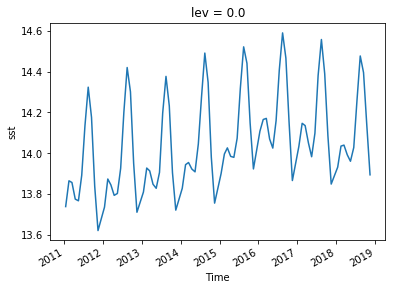

In [29]:
sst_test_ts.plot()

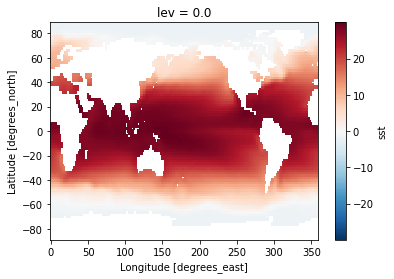

In [32]:
sst_test_map.plot()

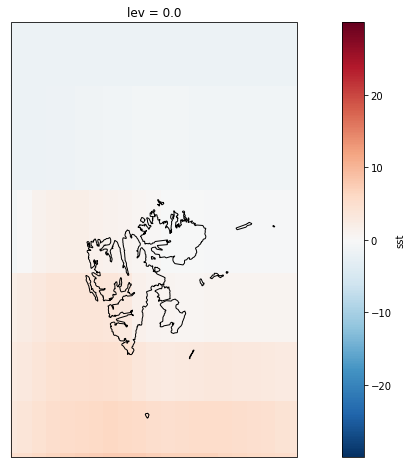

In [46]:
             
year_av = SIC['seaice_conc_monthly_cdr'].groupby('time.year').mean(dim='time')
proj = ccrs.NorthPolarStereo()
plt.figure(figsize=(14.5,9))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.gridlines()
ax.set_extent([-180,180,60,90], ccrs.PlateCarree())
year_av.plot(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', cbar_kwargs={'shrink': 0.4})